## Clustering

### k-Means

Hier wird der Datensatz importiert:

[[ 15.  39.]
 [ 15.  81.]
 [ 16.   6.]
 [ 16.  77.]
 [ 17.   4.]
 [ 17.  76.]
 [ 18.   6.]
 [ 18.  94.]
 [ 19.   3.]
 [ 19.  72.]
 [ 19.  14.]
 [ 19.  99.]
 [ 20.  15.]
 [ 20.  77.]
 [ 20.  13.]
 [ 20.  79.]
 [ 21.  35.]
 [ 21.  66.]
 [ 23.  29.]
 [ 23.  98.]
 [ 24.  35.]
 [ 24.  73.]
 [ 25.   5.]
 [ 25.  73.]
 [ 28.  14.]
 [ 28.  82.]
 [ 28.  32.]
 [ 28.  61.]
 [ 29.  31.]
 [ 29.  87.]
 [ 30.   4.]
 [ 30.  73.]
 [ 33.   4.]
 [ 33.  92.]
 [ 33.  14.]
 [ 33.  81.]
 [ 34.  17.]
 [ 34.  73.]
 [ 37.  26.]
 [ 37.  75.]
 [ 38.  35.]
 [ 38.  92.]
 [ 39.  36.]
 [ 39.  61.]
 [ 39.  28.]
 [ 39.  65.]
 [ 40.  55.]
 [ 40.  47.]
 [ 40.  42.]
 [ 40.  42.]
 [ 42.  52.]
 [ 42.   6.]
 [ 43.  54.]
 [ 43.   6.]
 [ 43.  45.]
 [ 43.  41.]
 [ 44.   5.]
 [ 44.  46.]
 [ 46.  51.]
 [ 46.  46.]
 [ 46.  56.]
 [ 46.  55.]
 [ 47.  52.]
 [ 47.  59.]
 [ 48.  51.]
 [ 48.  59.]
 [ 48.   5.]
 [ 48.  48.]
 [ 48.  59.]
 [ 48.  47.]
 [ 49.  55.]
 [ 49.  42.]
 [ 50.  49.]
 [ 50.  56.]
 [ 54.  47.]
 [ 54.  54.]
 [ 54.  53.]

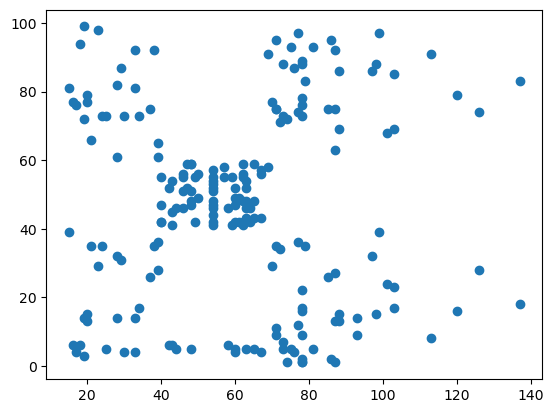

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

data = np.genfromtxt('data.csv', delimiter=',')
plt.scatter(data[:,0],data[:,1])

print(data)

Hier wird die Zahl der Cluster bestimmt und entsprechend viele Punkte werden initialisiert.

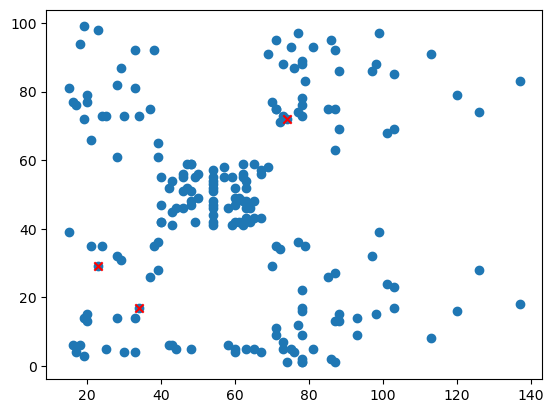

In [17]:
#Anzahl der gewünschten Cluster
n = 3

# Nehme n zufällige Punkte aus dem Array als Startmittelpunkte (hier die ersten 5)
centroids = data[np.random.randint(0,len(data), size=n)]
plt.scatter(data[:,0],data[:,1])
plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')


Berechnen Sie die Distanz im Quadrat zwischen zwei beliebigen Punkten. \
`np.linalg.norm()` ist die Betragsfunktion.

In [18]:
def dist(P1, P2):
    return np.linalg.norm(P1-P2)**2

Berechnen Sie mithilfe von `dist()` die Distanz zwischen jedem der Punkte zu jedem geometrischen Schwerpunkt und speichern Sie diese im Array distance.

In [19]:
def dist_matrix(data, centroids):
    l = data.shape[0]
    distance = np.zeros((l,n))

    for i in range(l):
        for j in range(n):
            distance[i,j] = dist(data[i], centroids[j])
    return distance

Führen Sie hier die Funktion `distance()` aus und berechnen speichern Sie im neuen Vektor `cluster` das entsprechende Cluster, der der Punkt zugeordnet wurde.

Tipp: `np.argmin` gibt die Indizes 

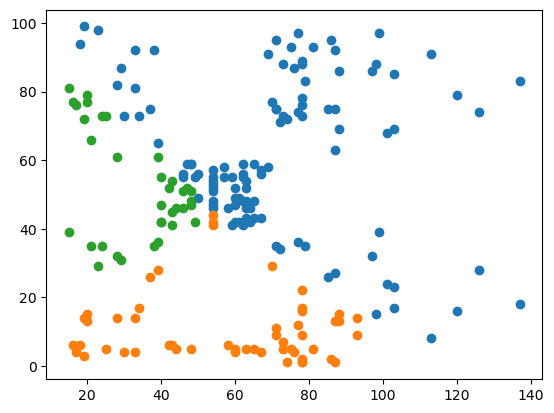

In [20]:
distance = dist_matrix(data, centroids)
cluster = np.argmin(distance, axis=1)

for i in range(n):
    plot_data = data[np.where(cluster==i)]
    plt.scatter(plot_data[:,0],plot_data[:,1])

Berechnen Sie die neuen geometrischen Schwerpunkte.

Tipp: mit `np.where()` kann auf den Index zugegriffen werden.

In [21]:
def new_centroids(data, cluster, n):
    centroids = np.zeros((n,2))
    for i in range(n):
        centroids[i] = np.mean(data[np.where(cluster==i)], axis = 0)
    return centroids

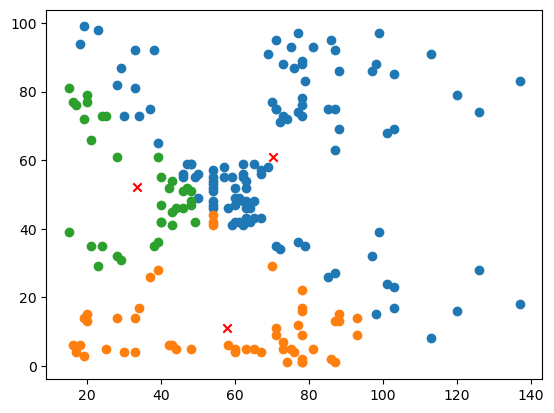

In [22]:
centroids = new_centroids(data, cluster, n)

for i in range(n):
    plot_data = data[np.where(cluster==i)]
    plt.scatter(plot_data[:,0],plot_data[:,1])
plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')

Nun ist es Zeit, den Code zusammenzusetzen und zu iterieren bis die Daten alle eindeutig einem Cluster zugehören.



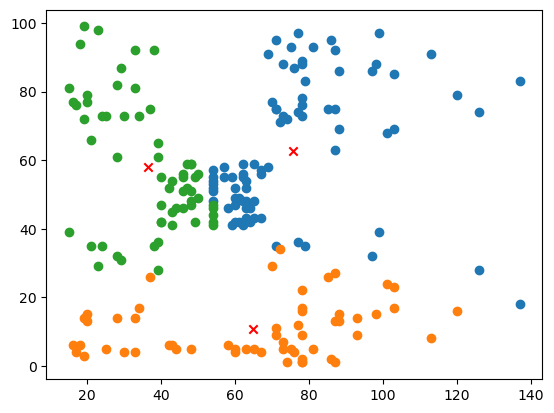

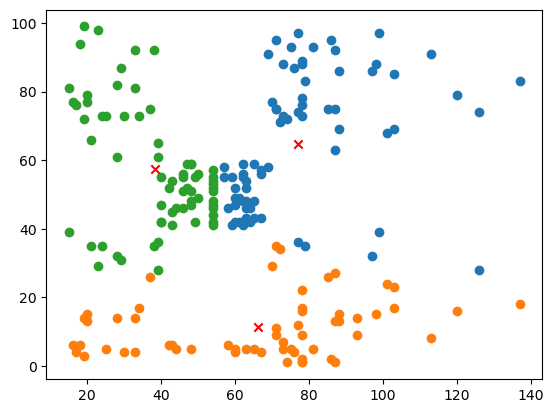

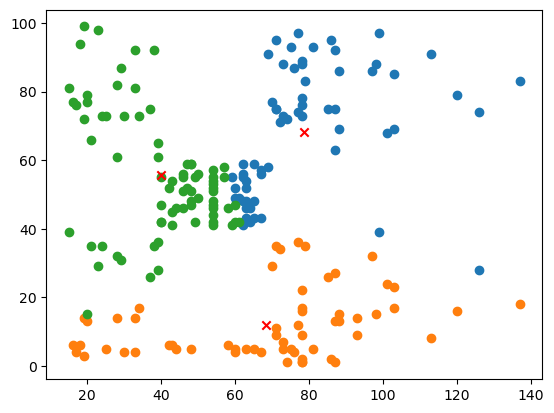

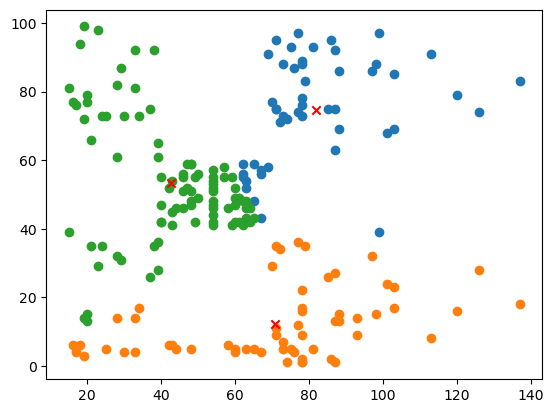

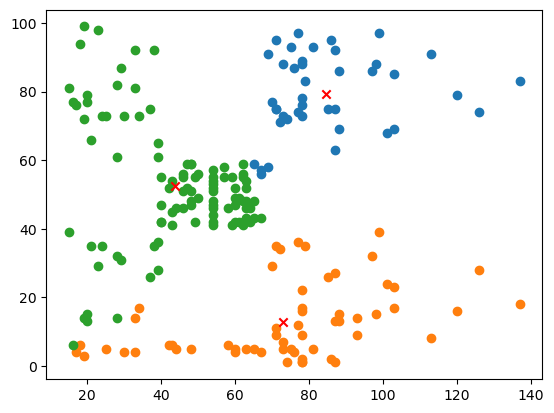

In [23]:
for i in range(5):
    distance = dist_matrix(data, centroids)
    cluster = np.argmin(distance, axis=1)
    centroids = new_centroids(data, cluster, n)

    # Anzeigen der Ergebnisse
    for i in range(n):
        plot_data = data[np.where(cluster==i)]
        plt.scatter(plot_data[:,0],plot_data[:,1])
    plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')
    plt.show()

### Anwendung an Bildern

Bild: Bliss (Windows XP Standard-Hintergrund)

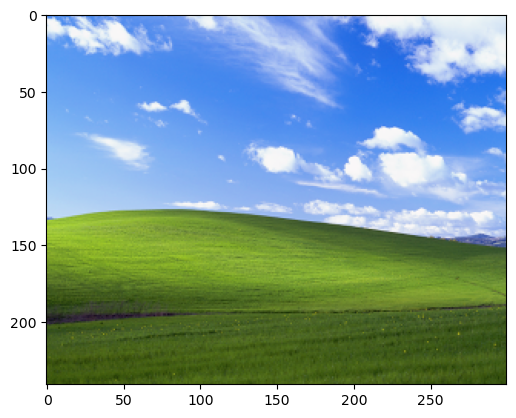

In [24]:
img = cv2.imread('bliss.png')[:,:,[2,1,0]]
plt.imshow(img, cmap="gray")

Mit Anpassung der Dimensionen (1 für Grauwertbilder, 3 für RGB-Bilder) in den oben implementierten Funktionen `dist_matrix()` und `new_centroids()` lassen sich Bilder segmentieren.

In [25]:
def dist_matrix(data, centroids):
    l = data.shape[0]
    distance = np.zeros((l,n))
    for i in range(l):
        for j in range(n):
            distance[i,j] = dist(data[i], centroids[j])
    return distance

def new_centroids(data, cluster, n):
    centroids = np.zeros((n,3))
    for i in range(n):
        centroids[i] = np.mean(data[np.where(cluster==i)], axis = 0)
    return centroids

Das Bild wird zunächst zu einer langen Matrix mit 1 bzw. 3 Spalten entpackt. Nach dem der k-Means-Algorithmus durchlaufen ist, werden die klassifizierten Werte wieder auf ihre ursprünglichen Koordinatenpunkte zurückgebracht.

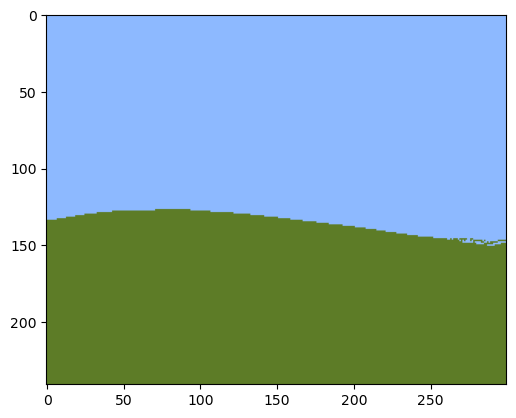

In [26]:
# n definiert die Anzahl der Segmente
n = 2

# Bild in Vektorform bringen
h,w,d = img.shape 
data = np.reshape(img, (h*w, 3))

# geometrische Schwerpunkte
# Da es nur eine Dimension hat, sind identische Werte wahrscheinlicher und sollten vermieden werden.
centroids = data[np.random.randint(0,len(data), size=n)]

# k-Means
for i in range(10):
    distance = dist_matrix(data, centroids)
    cluster = np.argmin(distance, axis=1)
    centroids = new_centroids(data, cluster, n)
    

# Wiederherstellen der Bilddimensionen
img_rec = centroids[cluster]
img_rec = np.reshape(img_rec, (h, w, d))
img_rec /= np.max(img_rec)
plt.imshow(img_rec)